In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from matplotlib import cm
import os
import pandas as pd

In [2]:
def get_data_mini_fixchannel(setting, step, moving_step=5):
    if info: print(setting)
    temp = list()
    seeds = [222, 223, 224, 225]
    for seed in seeds:
        for folder in ["0522_nips_fixchannel","0522_nips_fixchannel_TWCC","0522_nips_fixchannel_59"]:
            try: 
                foldername = "./results/miniimagenet/fixed_channel/{}_seed{}/test_E11S2300.csv".format(setting, seed)
                data = pd.read_csv(foldername).values[:,step]
                if info: print("\t", folder, seed, len(data))
                temp.append(data)
                continue
                break
            except: 
                pass
                    
    return moving_average(np.mean(temp, axis=0), moving_step),  moving_average(np.std(temp, axis=0), moving_step)

def moving_average(x, w):
    return np.concatenate((x[:5],np.convolve(x[5:], np.ones(w), 'valid') / w))

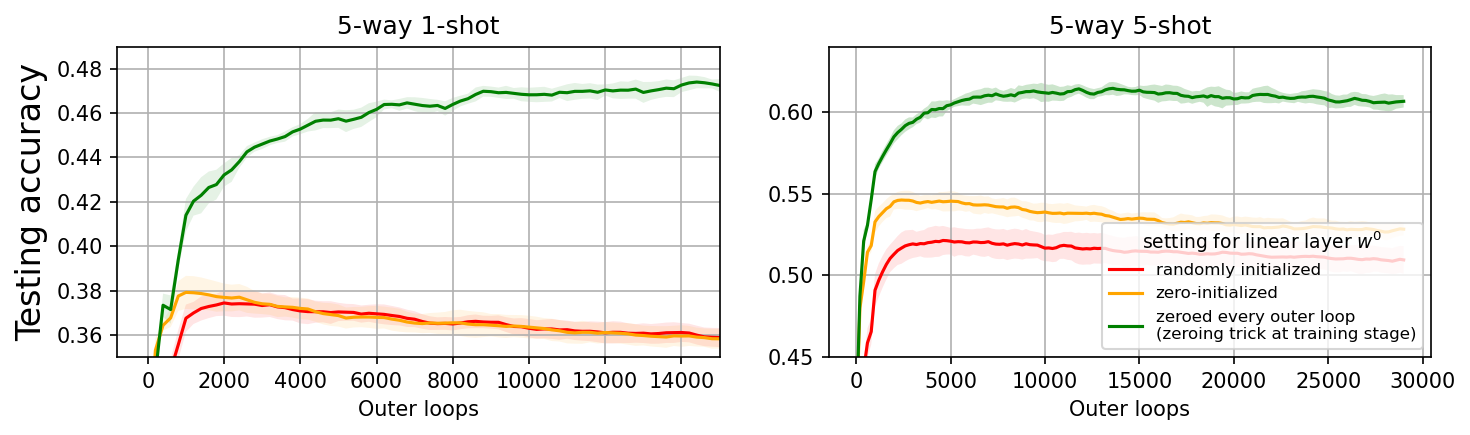

In [3]:
fill_color = True
info = True

# labels = [
#     "init: w", 
#     "init: w=0", 
#     "per outer loop: w=0",
# ]

labels = [
    "randomly initialized", 
    "zero-initialized", 
    "zeroed every outer loop \n(zeroing trick at training stage)",
]

fig, axes = plt.subplots(1,2,figsize=(10,3), dpi=150)
info = False
ax = axes[0]
step = 10
mean, std = get_data_mini_fixchannel("mini_5w1s15q_FO_initvar1.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[0], c="red")
ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="red", alpha=0.1)

mean, std = get_data_mini_fixchannel("mini_5w1s15q_FO_initvar0.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[1], c="orange")
ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="orange", alpha=0.1)

mean, std = get_data_mini_fixchannel("mini_5w1s15q_FO_zero1_initvar1.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[2], c="green")
ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="green", alpha=0.1)

ax = axes[1]
mean, std = get_data_mini_fixchannel("mini_5w5s15q_FO_initvar1.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[0], c="red")
ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="red", alpha=0.1)

mean, std = get_data_mini_fixchannel("mini_5w5s15q_FO_initvar0.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[1], c="orange")
ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="orange", alpha=0.1)

mean, std = get_data_mini_fixchannel("mini_5w5s15q_FO_zero1_initvar1.0", step)
ax.plot(np.arange(len(mean))*200, mean, label=labels[2], c="green")
ax.fill_between(np.arange(len(mean))*200, mean-std, mean+std, facecolor="green", alpha=0.2)

titles = [
    "5-way 1-shot",
    "5-way 5-shot"
]

for i, ax in enumerate(axes.flatten()):
    ax.set_title(titles[i])
    ax.set_xlabel("Outer loops")
    ax.tick_params(axis='both', which='major')
    
axes[0].set_ylabel("Testing accuracy", fontsize=16)
fig.tight_layout()

axes[1].legend(loc=4, title=r"setting for linear layer $w^0$", title_fontsize=9, fontsize=8)
axes[0].set_ylim([0.35, 0.49])
axes[1].set_ylim([0.45, 0.64])
axes[0].set_xlim([-800,15000]) 

axes[0].grid()
axes[1].grid()
plt.savefig("./images/mini_fixed_channel_20220301.pdf", bbox_inches='tight')